In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
STUDENT = 'Hồ Thành Đạt - 6351071017'
df = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/6351071017_Lab2/main/Dataset/winequality-red.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


### Câu 3

Hồ Thành Đạt - 6351071017


<Axes: >

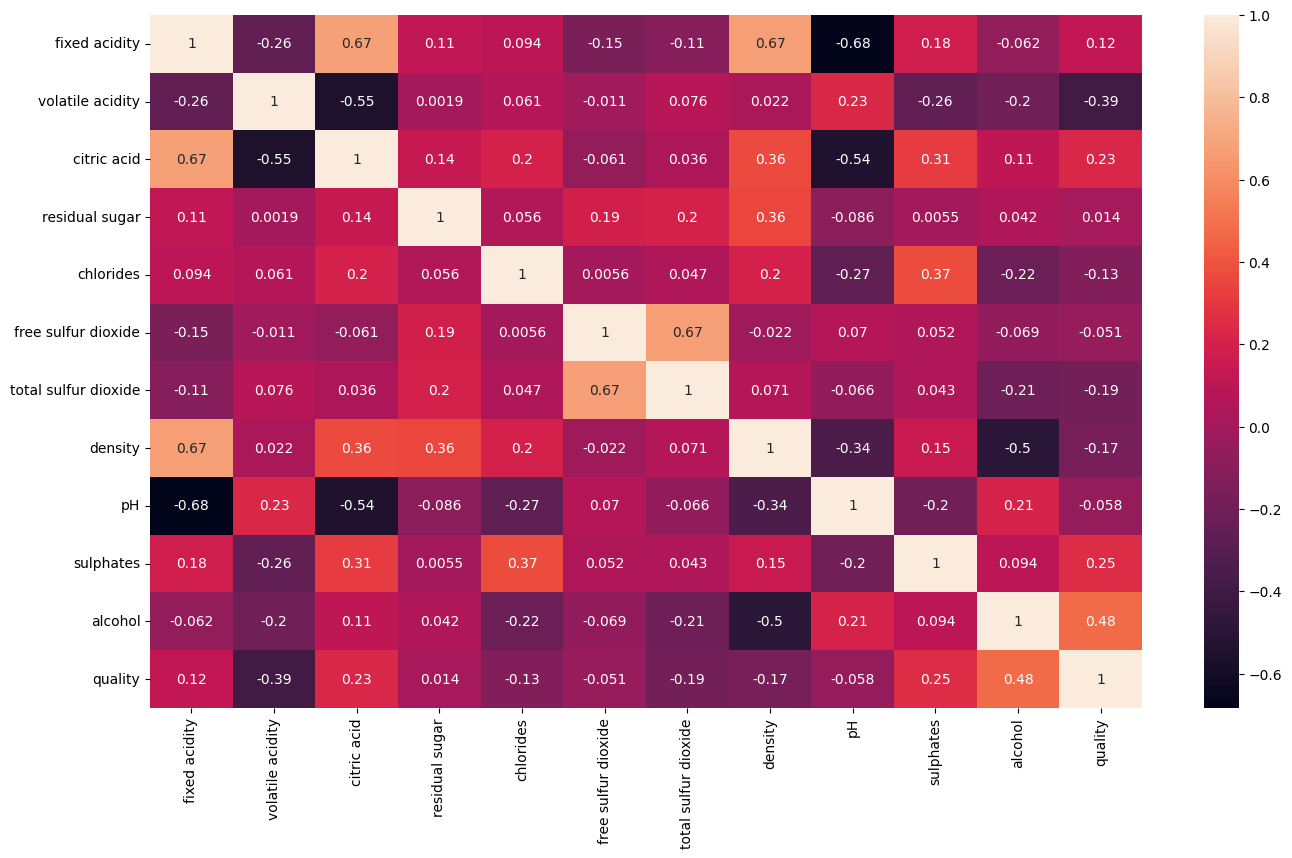

In [ ]:
print(STUDENT)
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

### Câu 4

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

### Câu 5

In [ ]:
print(STUDENT)
X.select_dtypes(exclude=['float64']).columns

Hồ Thành Đạt - 6351071017


Index([], dtype='object')

### Câu 6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Câu 7

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print(STUDENT)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Hồ Thành Đạt - 6351071017
Accuracy: 0.5833333333333334
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Hồ Thành Đạt - 6351071017


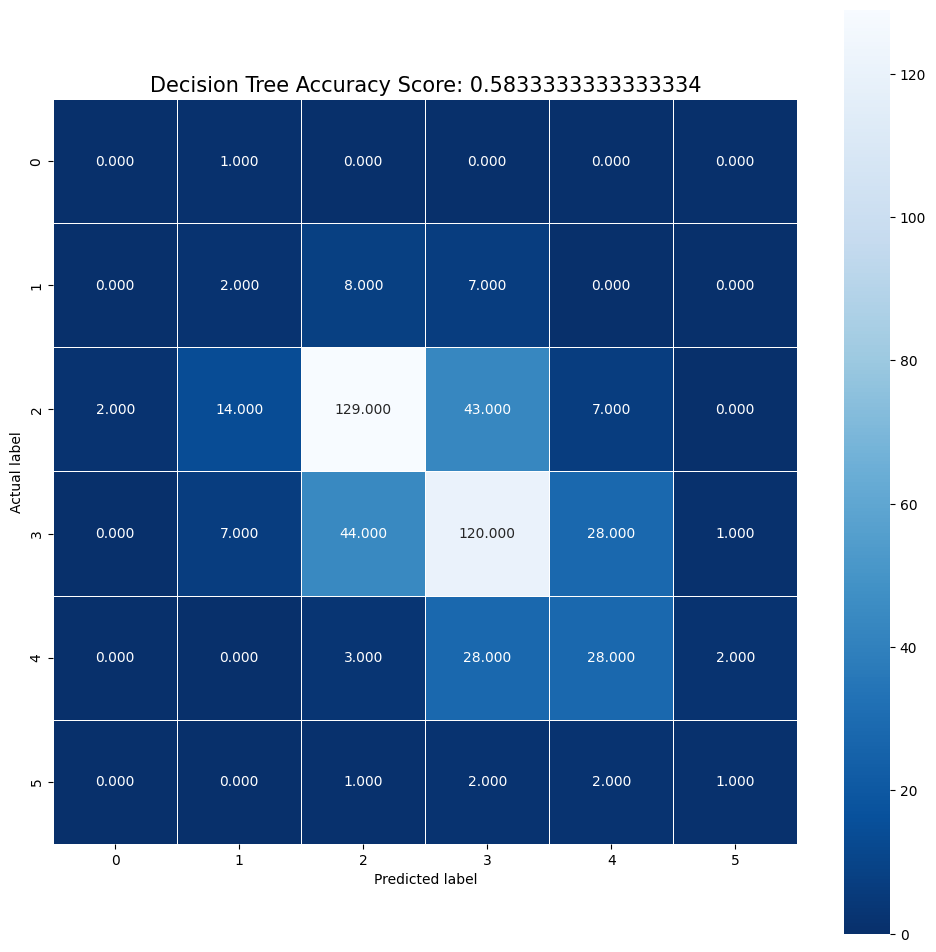

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
print(STUDENT)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15);

Hồ Thành Đạt - 6351071017


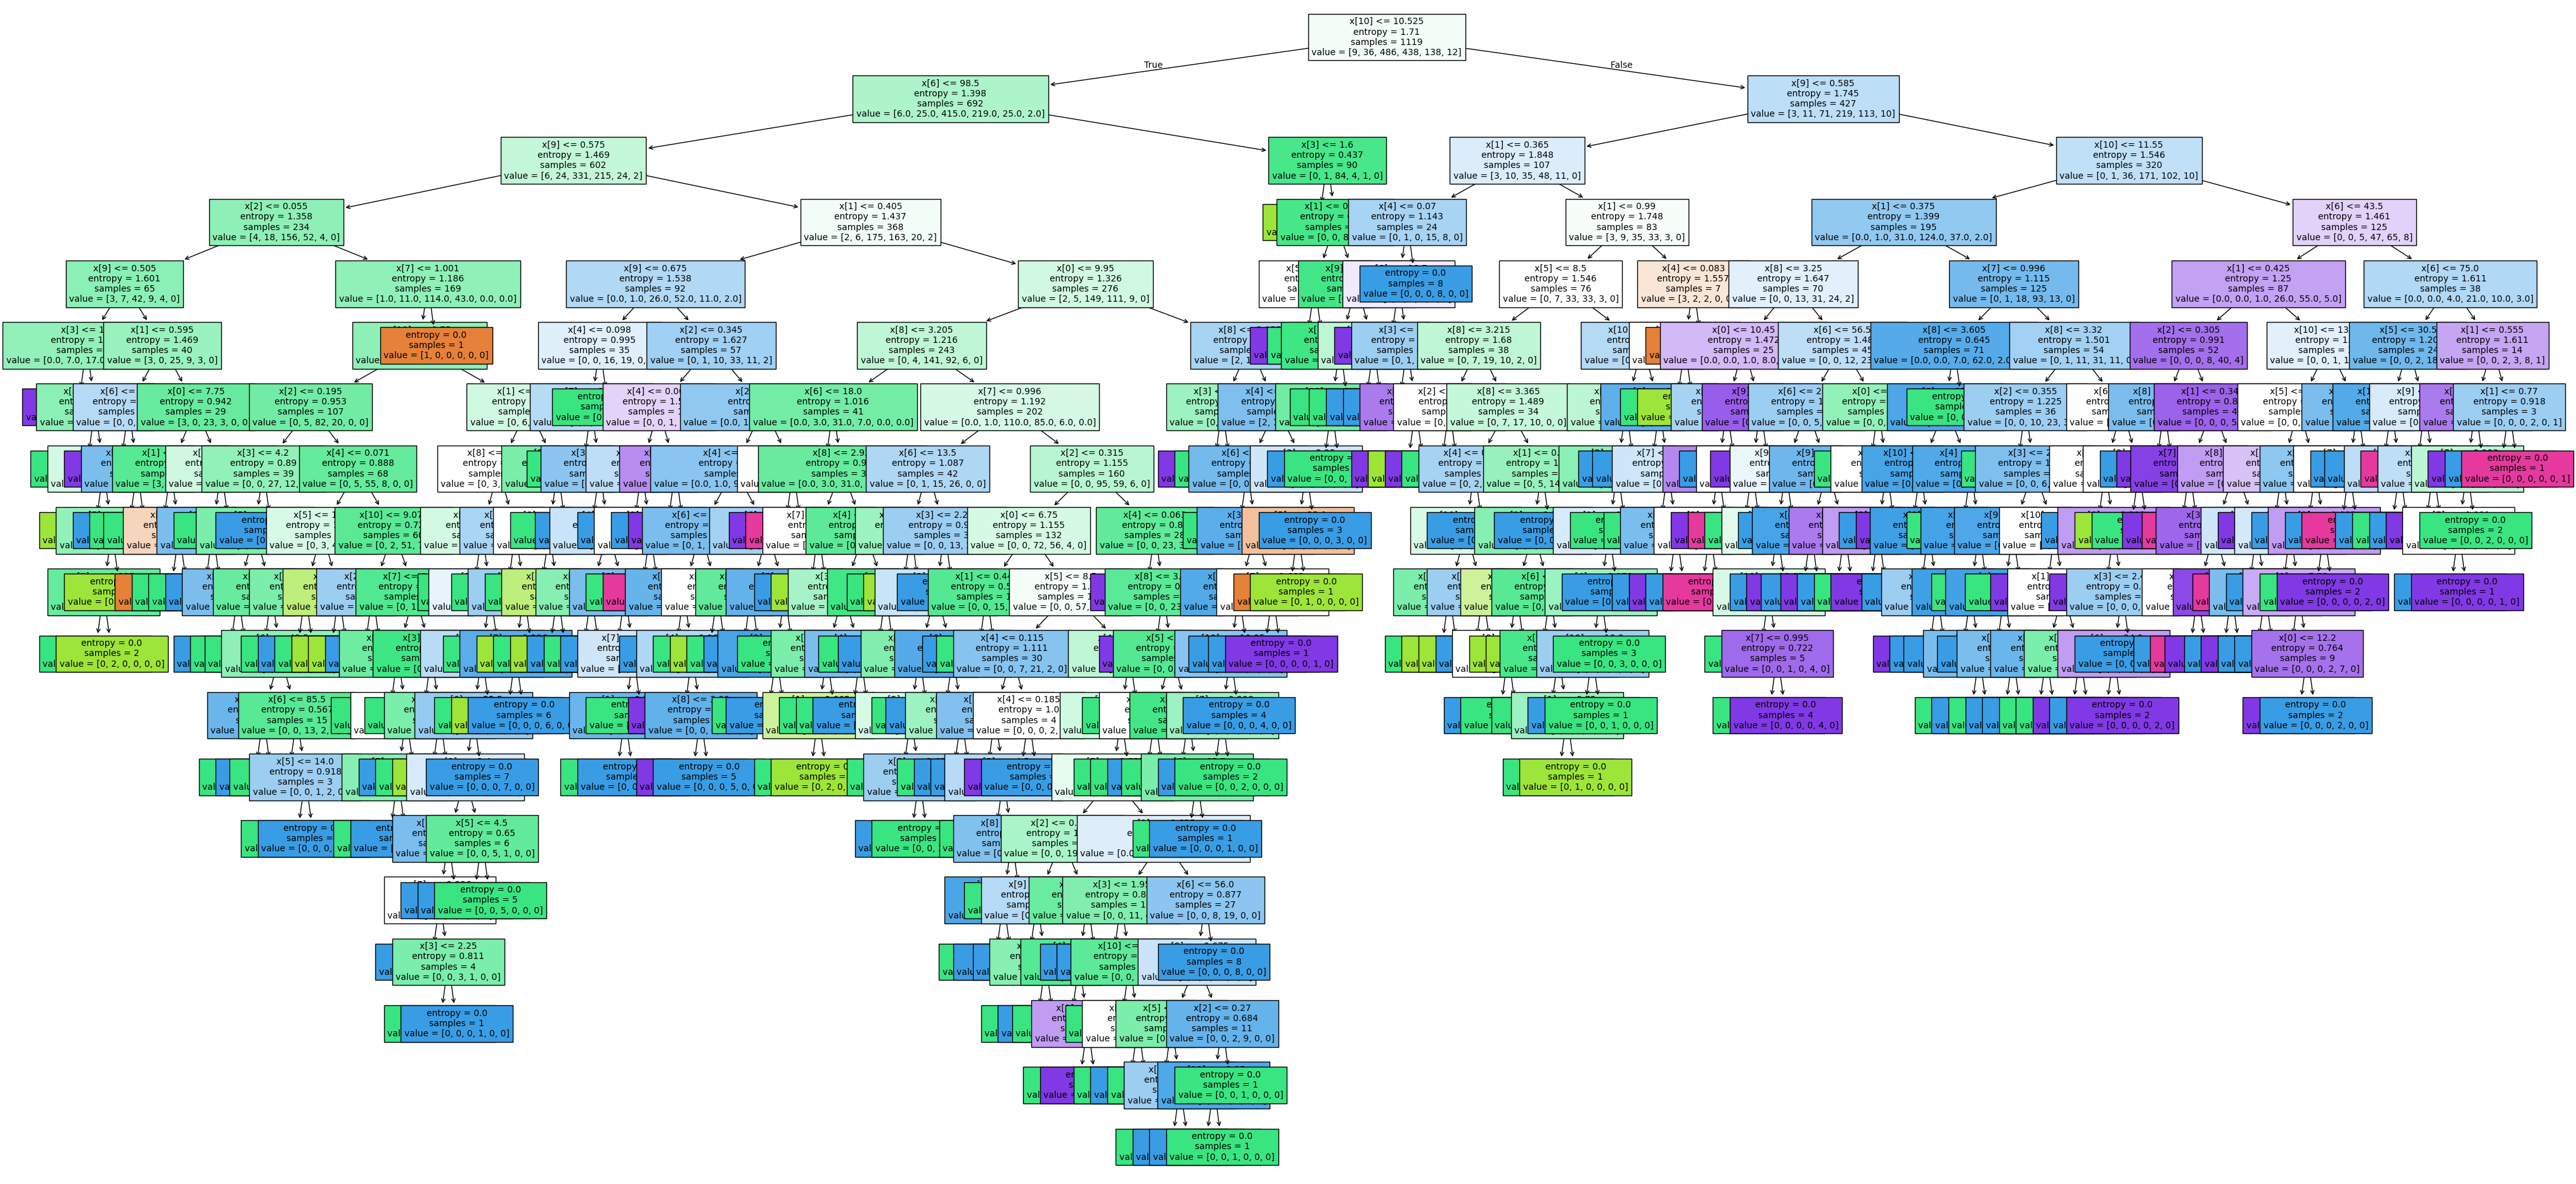

In [ ]:
fig, axes = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
print(STUDENT)
plt.show()

### Câu 8

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print(STUDENT)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Hồ Thành Đạt - 6351071017
Accuracy: 0.5625
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



Hồ Thành Đạt - 6351071017


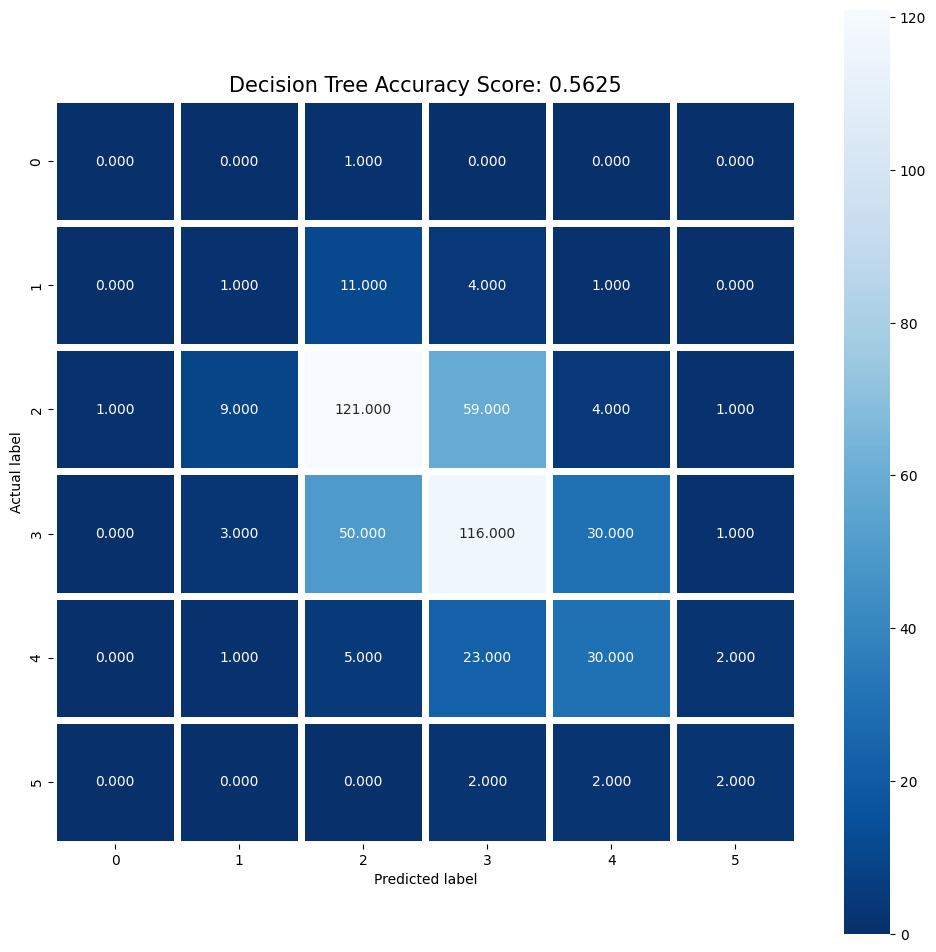

In [ ]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r');
print(STUDENT)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15);

### Câu 9

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print(STUDENT)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Hồ Thành Đạt - 6351071017
Accuracy: 0.5416666666666666
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



Hồ Thành Đạt - 6351071017


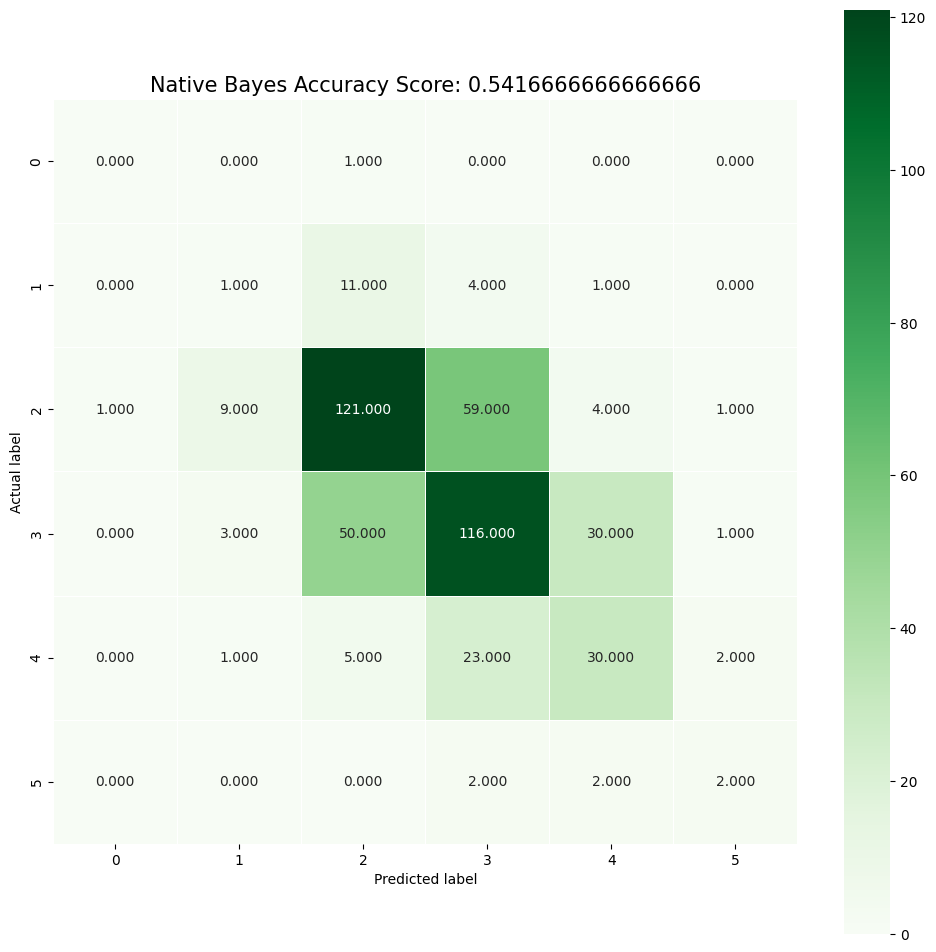

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens');
print(STUDENT)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Native Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15);

### Câu 10

Trong ba mô hình, Decision Tree (Entropy) đạt accuracy cao nhất (58.3%), vượt trội hơn Gini (56.2%) và Naive Bayes (54.2%), đồng thời có F1-score tốt hơn ở các lớp phổ biến (5, 6). Tuy nhiên, cả ba đều yếu trong dự đoán các lớp hiếm (3, 4, 8) do dữ liệu mất cân bằng. Entropy hiệu quả hơn Gini nhờ tối ưu chọn đặc trưng dựa trên thông tin, trong khi Naive Bayes kém do không xử lý tốt mối quan hệ phi tuyến. Để cải thiện, nên áp dụng SMOTE, class_weight, hoặc dùng Random Forest/XGBoost.